In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
from copy import deepcopy
import matplotlib.image as mpimg
from dataset_handler import df_to_anndata

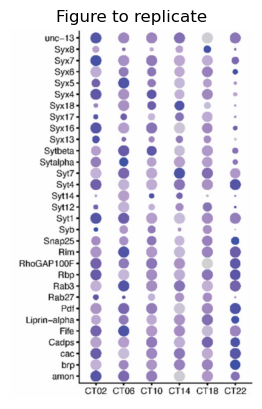

In [25]:
obj_img = mpimg.imread('wegener.png')
plt.imshow(obj_img)
plt.axis('off')
plt.title('Figure to replicate')
plt.show()

In [10]:
LNv_df = pd.read_csv('data_subsets/LNv_DD.csv', index_col=0)
LNv_ad = df_to_anndata(LNv_df)
print(LNv_ad)
print(LNv_ad.var_names)

AnnData object with n_obs × n_vars = 181 × 31
    obs: 'Idents', 'date', 'exp_time'
    var: 0
Index(['amon', 'brp', 'cac', 'Cadps', 'Fife', 'Liprin-alpha', 'Pdf', 'Rab27',
       'Rab3', 'Rbp', 'RhoGAP100F', 'Rim', 'Snap25', 'Syb', 'Syt1', 'Syt12',
       'Syt14', 'Syt4', 'Syt7', 'Sytalpha', 'Sytbeta', 'Syx13', 'Syx16',
       'Syx17', 'Syx18', 'Syx4', 'Syx5', 'Syx6', 'Syx7', 'Syx8', 'unc-13'],
      dtype='object')


Keep a copy of the original anndata structure for replicability

In [11]:
og_ad_LNv = deepcopy(LNv_ad)

In [21]:
def make_dotplot(title: str):
    title = 'DD'
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))
    dotplot = sc.pl.DotPlot(LNv_ad,
                            var_names=LNv_ad.var_names[::-1],
                            groupby='exp_time',
                            standard_scale='var',
                            var_group_rotation=0.,
                            edgecolors=None,
                            mean_only_expressed=True,
                            figsize=(5, 7),
                            title=title,
                            cmap='Purples',
                            linewidth=0.,
                            ax=axs[0],)
    dotplot.DEFAULT_CATEGORY_WIDTH = 0.7
    dotplot.DEFAULT_CATEGORY_HEIGHT = 0.4
    dotplot.DEFAULT_PLOT_Y_PADDING = 2
    axs[1].imshow(obj_img,interpolation='nearest', aspect='auto')
    axs[1].set_title('Figura original')
    axs[1].axis('off')
    dotplot.swap_axes().show()

c:\Users\gonza\miniconda3\envs\psivenv\Lib\site-packages\scanpy\preprocessing\_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


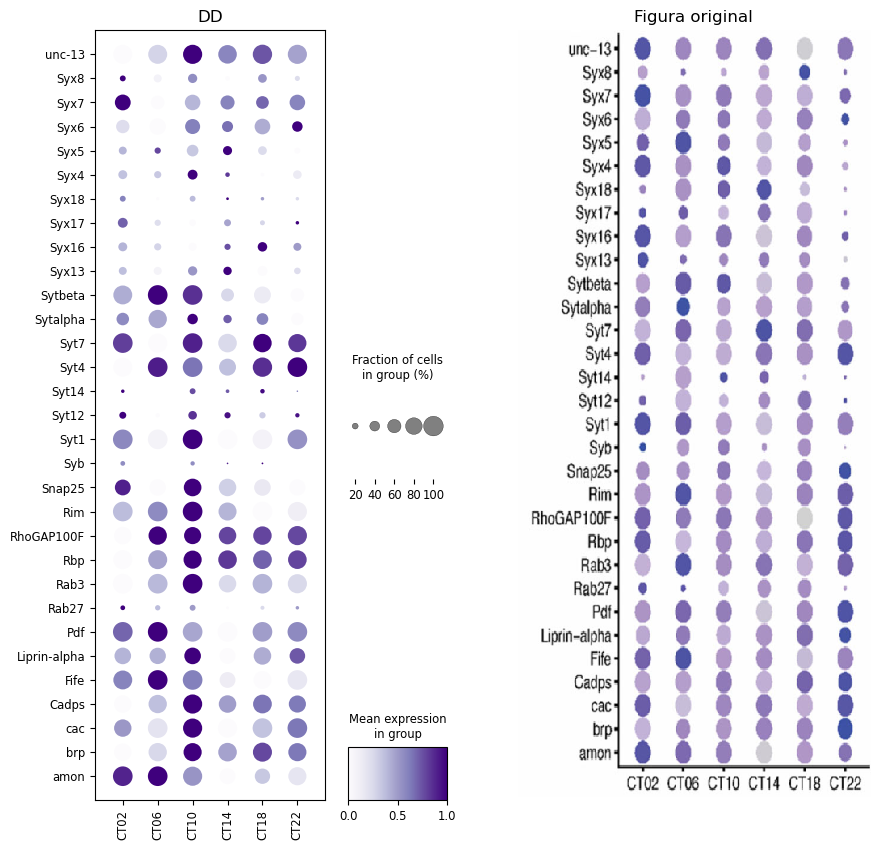

In [24]:
# hiperparametros
target_sum = 1e6
exclude_highly_expressed = True

# normalizaciones
LNv_ad = deepcopy(og_ad_LNv)
sc.pp.log1p(LNv_ad)
sc.pp.normalize_total(LNv_ad, target_sum=target_sum,
                      exclude_highly_expressed=exclude_highly_expressed,
                      inplace=False)

# ploteo
make_dotplot(title='DD')